Total WAV files: 7000
Maximum duration: 22.00 seconds
Average duration: 4.53 seconds


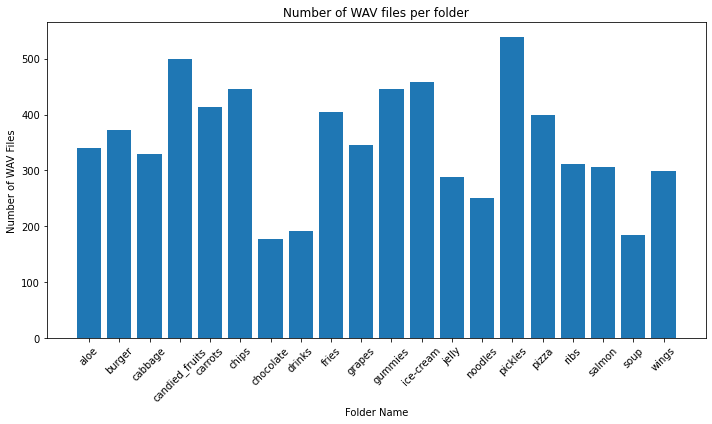

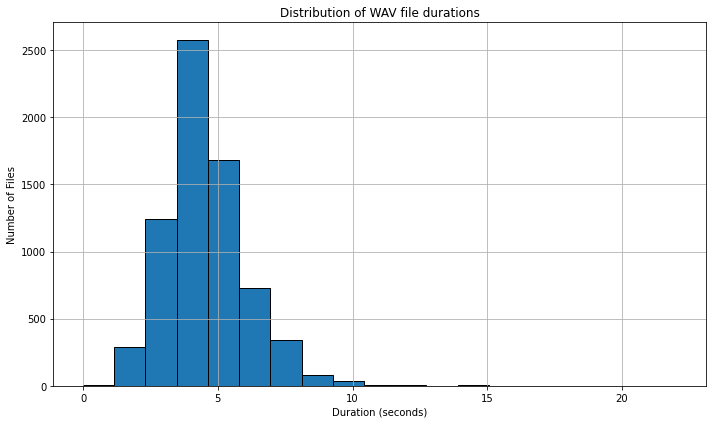

In [4]:
import os
import wave
import contextlib
import matplotlib.pyplot as plt
import numpy as np

def get_wav_duration(file_path):
    with contextlib.closing(wave.open(file_path, 'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        return frames / float(rate)

def analyze_audio_durations(root_folder):
    durations = []
    folder_counts = {}
    
    for root, dirs, files in os.walk(root_folder):
        wav_count = sum(1 for file in files if file.endswith('.wav'))
        if wav_count > 0:
            folder_name = os.path.basename(root)
            folder_counts[folder_name] = wav_count
            
        for file in files:
            if file.endswith('.wav'):
                file_path = os.path.join(root, file)
                try:
                    duration = get_wav_duration(file_path)
                    durations.append(duration)
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    
    if not durations:
        print("No WAV files found in the specified directory.")
        return
    
    max_duration = max(durations)
    avg_duration = sum(durations) / len(durations)
    
    print(f"Total WAV files: {len(durations)}")
    print(f"Maximum duration: {max_duration:.2f} seconds")
    print(f"Average duration: {avg_duration:.2f} seconds")
    
    # 绘制文件夹wav文件数量柱状图
    if folder_counts:
        plt.figure(figsize=(10, 6))
        plt.bar(folder_counts.keys(), folder_counts.values())
        plt.title('Number of WAV files per folder')
        plt.xlabel('Folder Name')
        plt.ylabel('Number of WAV Files')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
    
    # 绘制时长分布柱状图
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, max_duration, 20)  # 分成20个区间
    plt.hist(durations, bins=bins, edgecolor='black')
    plt.title('Distribution of WAV file durations')
    plt.xlabel('Duration (seconds)')
    plt.ylabel('Number of Files')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 直接指定train文件夹路径
train_folder = os.path.join('data', 'train')
analyze_audio_durations(train_folder)